In [21]:
using LinearAlgebra
using Plots
using DelimitedFiles
t = 2
delta = 6
Ucf = 12.4
smalldelta = 0.01

0.01

In [22]:
Hg =  [
   0 t
   t delta ]

2×2 Matrix{Int64}:
 0  2
 2  6

In [23]:
Hf =  [
   0 t
   t delta - Ucf  ]

2×2 Matrix{Float64}:
 0.0   2.0
 2.0  -6.4

In [24]:
Eg,Vg = eigen(Hg)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -0.6055512754639892
  6.60555127546399
vectors:
2×2 Matrix{Float64}:
 -0.957092  0.289784
  0.289784  0.957092

In [25]:
Ef,Vf = eigen(Hf)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -6.973592452822642
  0.5735924528226415
vectors:
2×2 Matrix{Float64}:
 -0.275683  -0.961249
  0.961249  -0.275683

In [26]:
function F1(Eg,Vg,Ef,Vf,Eb)
   return ((abs(dot(Vg[:,1],Vf[:,1])))^2)/(Eb+Eg-Ef+im*smalldelta)
end

F1 (generic function with 1 method)

In [27]:
function F2(Eg,Vg,Ef,Vf,Eb)
    return ((abs(dot(Vg[:,1],Vf[:,2])))^2)/(Eb+Eg-Ef+im*smalldelta)
 end

F2 (generic function with 1 method)

In [28]:
fp = open("xpsoutput.dat","w")
for Eb in -10:0.005:10
    ints = (-1/pi)imag( F1(Eg[1],Vg,Ef[1],Vf,Eb)+ F2(Eg[1],Vg,Ef[2],Vf,Eb))
    println(fp,Eb,",",ints)
end
close(fp)

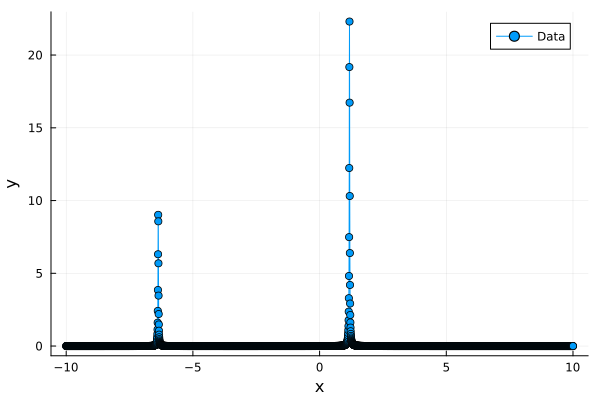

In [29]:
# ファイルを読み取り
data = readdlm("xpsoutput.dat",',')

# データを x と y に分割
x = data[:, 1]
y = data[:, 2]

# サイズの変更
x = x[:]
y = y[:]

# プロットを作成
plot(x, y, xlabel="x", ylabel="y", label="Data", marker=:circle)
